In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def combine_result(LC, MSE):
    plt.semilogy(LC, 'b--', label='Theory')
    plt.semilogy(MSE, 'k-', label='Experiment')
    plt.legend(loc="upper right")
    plt.title('Learning-rate parameter')
    plt.xlabel("Number of iterations, n")
    plt.ylabel("Mean-square error")
    plt.show()

In [3]:
def LMS_AR(eta):
    sigu2 = 0.93627
    variance = 0.02
    a = 0.99
    xi0 = 0
    t = np.asarray(range(1, 5001))
    error_full = None

    for iteration in range(100):
        # generative model: x(n) = a*x(n-1) + epsilon(n)
        mean, std_dvt = 0, math.sqrt(variance)
        epsilon = np.random.normal(mean, std_dvt, size=1000000)

        x = [_ for _ in range(1000000)]
        x[0] = epsilon[0]

        for i in range(1, 1000000):
            if i == 1:
                x[1] = a*x[0] + epsilon[1]
            else:
                x[i] = a*x[i-1] + epsilon[i]

        x = np.asarray(x).reshape(1000000, 1)
        x = x[-5000:]


        w = 0
        w0 = []
        n = 0
        w0.append(w)
        w0 = np.asarray(w0)

        
        x_predict = np.zeros((5000, 1))
        error = np.zeros((5000, 1))

        x_predict[n, :] = xi0 * w
        # Error: e(n) = d(n) - transpose(w) * x(n)
        error[n, :] = x[n, :] - x_predict[n, :]
        # Weight: w(n+1) = w(n) + eta * x(n) * e(n)
        w = w + eta * error[n, :].T * xi0

  
        N = x.shape[0]
        for n in range(1, N):
            w0 = np.append(w0, w)
            x_predict[n, :] = x[n-1, :] * w
            error[n, :] = x[n, :] - x_predict[n, :]
            w = w + eta * error[n, :].T * x[n-1, :]

        if iteration == 0:
            error_full = np.copy(error)
        else:
            error_full = np.concatenate((error_full, np.copy(error)), axis=0)

    
    error_full = error_full.reshape((100, 5000))

    # LMS learning curve
    LC = sigu2*(1-a**2)*(1+(eta/2)*sigu2) + sigu2*(a**2+(eta/2)*(a**2)*sigu2-0.5*eta*sigu2)*(1-eta*sigu2)**(2*t)

    # LMS mean square error
    MSE = np.mean(np.square(error_full), axis=0)

    combine_result(LC, MSE)

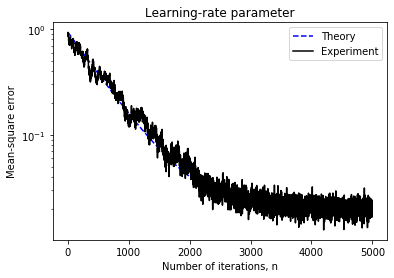

In [4]:
LMS_AR(0.001)

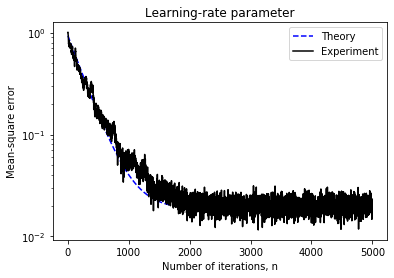

In [5]:
LMS_AR(0.002)

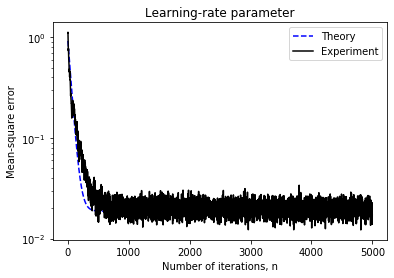

In [6]:
LMS_AR(0.01)

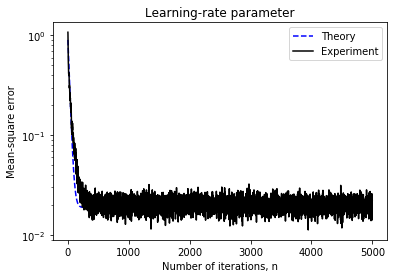

In [7]:
LMS_AR(0.02)